Agave on Python

In [1]:
!mkdir -p ~/agave

In [2]:
%cd ~/agave

/home/sbrandt/agave


In [3]:
import re
import os
import sys
from setvar import *

In [3]:
!git clone https://github.com/fengyanshi/FUNWAVE-TVD

Cloning into 'FUNWAVE-TVD'...
remote: Counting objects: 1685, done.
remote: Total 1685 (delta 0), reused 0 (delta 0), pack-reused 1685
Receiving objects: 100% (1685/1685), 21.78 MiB | 4.74 MiB/s, done.
Resolving deltas: 100% (918/918), done.


In [54]:
%cd ./FUNWAVE-TVD/src

/home/sbrandt/agave/FUNWAVE-TVD/src


In [4]:
setvar("PATH=/usr/lib64/openmpi/bin:$PATH")
!perl -p -i -e 's/FLAG_8 = -DCOUPLING/#$&/' Makefile
!make

PATH=/usr/lib64/openmpi/bin:/usr/local/bin/anaconda2/bin:/root/anaconda2/bin:/usr/local/bin/anaconda2/bin:/root/anaconda2/bin:/usr/local/sbin:/usr/local/bin:/sbin:/bin:/usr/sbin:/usr/bin:/root/bin
Can't open Makefile: No such file or directory.
make: *** No targets specified and no makefile found.  Stop.


In [56]:
%%writefile input.txt
!INPUT FILE FOR FUNWAVE_TVD
  ! NOTE: all input parameter are capital sensitive
  ! --------------------TITLE-------------------------------------
  ! title only for log file
TITLE = VESSEL
  ! -------------------HOT START---------------------------------
HOT_START = F
FileNumber_HOTSTART = 1
  ! -------------------PARALLEL INFO-----------------------------
  ! 
  !    PX,PY - processor numbers in X and Y
  !    NOTE: make sure consistency with mpirun -np n (px*py)
  !    
PX = 4
PY = 1
  ! --------------------DEPTH-------------------------------------
  ! Depth types, DEPTH_TYPE=DATA: from depth file
  !              DEPTH_TYPE=FLAT: idealized flat, need depth_flat
  !              DEPTH_TYPE=SLOPE: idealized slope, 
  !                                 need slope,SLP starting point, Xslp
  !                                 and depth_flat
DEPTH_TYPE = FLAT
DEPTH_FLAT = 10.0
  ! -------------------PRINT---------------------------------
  ! PRINT*,
  ! result folder
RESULT_FOLDER = output/

  ! ------------------DIMENSION-----------------------------
  ! global grid dimension
Mglob = 500
Nglob = 100

  ! ----------------- TIME----------------------------------
  ! time: total computational time/ plot time / screen interval 
  ! all in seconds
TOTAL_TIME = 20.0
PLOT_INTV = 1.0
PLOT_INTV_STATION = 50000.0
SCREEN_INTV = 1.0
HOTSTART_INTV = 360000000000.0

  ! -----------------GRID----------------------------------
  ! if use spherical grid, in decimal degrees
  ! cartesian grid sizes
DX = 1.0
DY = 1.0
  ! ----------------SHIP WAKES ----------------------------
VESSEL_FOLDER = ./
NumVessel = 2
  ! -----------------OUTPUT-----------------------------
ETA = T
U = T
V = T

Overwriting input.txt


In [57]:
!mpirun -np 4 ./funwave_vessel

 BATHY_CORRECTION DOES NOT EXIST. USE DEFAULT VALUE
 INI_UVZ DOES NOT EXIST. USE DEFAULT VALUE
 WaterLevel DOES NOT EXIST. USE DEFAULT VALUE
 WAVEMAKER DOES NOT EXIST. USE DEFAULT VALUE
                            No WaveMaker
 ETA_LIMITER DOES NOT EXIST. USE DEFAULT VALUE
 EqualEnergy DOES NOT EXIST. USE DEFAULT VALUE
 PERIODIC DOES NOT EXIST. USE DEFAULT VALUE
 DIFFUSION_SPONGE DOES NOT EXIST. USE DEFAULT VALUE
 DIRECT_SPONGE DOES NOT EXIST. USE DEFAULT VALUE
 FRICTION_SPONGE DOES NOT EXIST. USE DEFAULT VALUE
 OBSTACLE_FILE DOES NOT EXIST. USE DEFAULT VALUE
 BREAKWATER_FILE DOES NOT EXIST. USE DEFAULT VALUE
 DISPERSION DOES NOT EXIST. USE DEFAULT VALUE
         DISPERSION Default:  DISPERSION
 Gamma1 DOES NOT EXIST. USE DEFAULT VALUE
        Gamma1 Default:  1.0: DISPERSION
 Gamma2 DOES NOT EXIST. USE DEFAULT VALUE
              Gamma2 Default:  1.0: Full nonlinear
 Beta_ref DOES NOT EXIST. USE DEFAULT VALUE
               Beta_ref Default:  -0.531
 Gamma3 DOES NOT EXIST. USE DEFAULT

 ----------------- STATISTICS ----------------
  TIME        DT
  0.1101E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.3805E-04  0.6131E+07  0.4489E-05 -0.4257E-05  0.7346E-06  0.7018E-06
  MaxTotalU   PhaseS      Froude 
  0.8436E-06  0.9905E+01  0.8518E-07
   PRINTING FILE NO.    12  TIME/TOTAL:       11.005 /      20.000
 ----------------- STATISTICS ----------------
  TIME        DT
  0.1201E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.4118E-04  0.6131E+07  0.4569E-05 -0.3969E-05  0.7774E-06  0.7795E-06
  MaxTotalU   PhaseS      Froude 
  0.8925E-06  0.9905E+01  0.9011E-07
   PRINTING FILE NO.    13  TIME/TOTAL:       12.015 /      20.000
 ----------------- STATISTICS ----------------
  TIME        DT
  0.1302E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.3310E-04  0.6131E+07  0.4973E-05 -0.4373E-05  0.7874E-06  0.7187E-06
  MaxTotalU   PhaseS      Froud

In [5]:
# This cell enables inline plotting in the notebook
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [67]:
!ls output

eta_00001  eta_00012  eta_00023  u_00005  u_00016  u_00027  v_00009  v_00020
eta_00002  eta_00013  eta_00024  u_00006  u_00017  u_00028  v_00010  v_00021
eta_00003  eta_00014  eta_00025  u_00007  u_00018  u_00029  v_00011  v_00022
eta_00004  eta_00015  eta_00026  u_00008  u_00019  v_00001  v_00012  v_00023
eta_00005  eta_00016  eta_00027  u_00009  u_00020  v_00002  v_00013  v_00024
eta_00006  eta_00017  eta_00028  u_00010  u_00021  v_00003  v_00014  v_00025
eta_00007  eta_00018  eta_00029  u_00011  u_00022  v_00004  v_00015  v_00026
eta_00008  eta_00019  u_00001	 u_00012  u_00023  v_00005  v_00016  v_00027
eta_00009  eta_00020  u_00002	 u_00013  u_00024  v_00006  v_00017  v_00028
eta_00010  eta_00021  u_00003	 u_00014  u_00025  v_00007  v_00018  v_00029
eta_00011  eta_00022  u_00004	 u_00015  u_00026  v_00008  v_00019


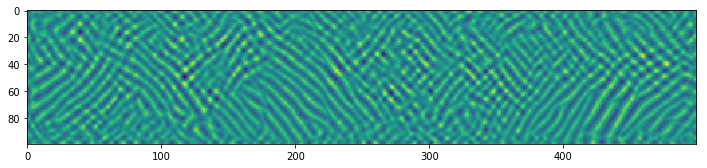

In [68]:
data = np.genfromtxt("output/eta_00020")
plt.figure(figsize=(12,12))
plt.imshow(data[::-1,:])
plt.show()

In [131]:
writefile("entrypoint.sh","""
#!/bin/bash
useradd --shell /bin/bash -u \$USER_ID -o -p foobar -c "" -m user
export HOME=/home/user
echo ARGS: \$@
id

exec su - user -c "\$@"
""")

Writing file `entrypoint.sh'


In [132]:
writefile("Dockerfile","""
FROM ubuntu:16.04

MAINTAINER Rion Dooley <dooley@tacc.utexas.edu>

# add build tools and python to the sandbox
RUN apt-get update && \
    apt-get install -y --allow-unauthenticated make git gfortran libopenmpi-dev sudo && \
    apt-get purge
RUN adduser jovyan
USER jovyan

# add application code, funwave-tvd
RUN cd && \
    git clone https://github.com/fengyanshi/FUNWAVE-TVD && \
    cd FUNWAVE-TVD/src && \
    perl -p -i -e 's/FLAG_8 = -DCOUPLING/#$&/' Makefile && \
    make

WORKDIR /home/jovyan/FUNWAVE-TVD/src
RUN mkdir -p /home/jovyan/FUNWAVE-TVD/rundir
WORKDIR /home/jovyan/FUNWAVE-TVD/rundir
USER root
COPY entrypoint.sh /usr/local/bin
RUN chmod 755 /usr/local/bin/entrypoint.sh
ENTRYPOINT ["/usr/local/bin/entrypoint.sh"]
""")

Writing file `Dockerfile'


In [133]:
!docker build --rm -t funwave-tvd .

Sending build context to Docker daemon  74.69MB
Step 1/13 : FROM ubuntu:16.04
 ---> ccc7a11d65b1
Step 2/13 : MAINTAINER Rion Dooley <dooley@tacc.utexas.edu>
 ---> Using cache
 ---> a83af9edf6db
Step 3/13 : RUN apt-get update &&     apt-get install -y --allow-unauthenticated make git gfortran libopenmpi-dev sudo &&     apt-get purge
 ---> Using cache
 ---> 510e389b588c
Step 4/13 : RUN adduser jovyan
 ---> Using cache
 ---> f1639ecfa555
Step 5/13 : USER jovyan
 ---> Using cache
 ---> a04e152b294d
Step 6/13 : RUN cd &&     git clone https://github.com/fengyanshi/FUNWAVE-TVD &&     cd FUNWAVE-TVD/src &&     perl -p -i -e 's/FLAG_8 = -DCOUPLING/#$&/' Makefile &&     make
 ---> Using cache
 ---> cf95bb985de1
Step 7/13 : WORKDIR /home/jovyan/FUNWAVE-TVD/src
 ---> Using cache
 ---> a2b2f6816085
Step 8/13 : RUN mkdir -p /home/jovyan/FUNWAVE-TVD/rundir
 ---> Using cache
 ---> 318b2ca3b45a
Step 9/13 : WORKDIR /home/jovyan/FUNWAVE-TVD/rundir
 ---> Using cache
 ---> 6283b41409d7
Step 10/13 : USER r

In [150]:
!rm -fr rundir
!mkdir -p rundir
!cp input.txt rundir/
!docker run -it --user 0 --rm -e USER_ID=$(id -u) -v ~/agave/FUNWAVE-TVD/src/rundir:/home/user funwave-tvd \
    'mpirun -np 4 /home/jovyan/FUNWAVE-TVD/src/funwave_vessel'

useradd: warning: the home directory already exists.
Not copying any file from skel directory into it.
ARGS: mpirun -np 4 /home/jovyan/FUNWAVE-TVD/src/funwave_vessel
uid=0(root) gid=0(root) groups=0(root)
 BATHY_CORRECTION DOES NOT EXIST. USE DEFAULT VALUE
 INI_UVZ DOES NOT EXIST. USE DEFAULT VALUE
 WaterLevel DOES NOT EXIST. USE DEFAULT VALUE
 WAVEMAKER DOES NOT EXIST. USE DEFAULT VALUE
                            No WaveMaker
 ETA_LIMITER DOES NOT EXIST. USE DEFAULT VALUE
 EqualEnergy DOES NOT EXIST. USE DEFAULT VALUE
 PERIODIC DOES NOT EXIST. USE DEFAULT VALUE
 DIFFUSION_SPONGE DOES NOT EXIST. USE DEFAULT VALUE
 DIRECT_SPONGE DOES NOT EXIST. USE DEFAULT VALUE
 FRICTION_SPONGE DOES NOT EXIST. USE DEFAULT VALUE
 OBSTACLE_FILE DOES NOT EXIST. USE DEFAULT VALUE
 BREAKWATER_FILE DOES NOT EXIST. USE DEFAULT VALUE
 DISPERSION DOES NOT EXIST. USE DEFAULT VALUE
         DISPERSION Default:  DISPERSION
 Gamma1 DOES NOT EXIST. USE DEFAULT VALUE
        Gamma1 Default:  1.0: DISPERSION
 Gamma2 

 ----------------- STATISTICS ----------------
  TIME        DT
  0.1101E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.3805E-04  0.6131E+07  0.4489E-05 -0.4257E-05  0.7346E-06  0.7018E-06
  MaxTotalU   PhaseS      Froude 
  0.8436E-06  0.9905E+01  0.8518E-07
   PRINTING FILE NO.    12  TIME/TOTAL:       11.005 /      20.000
 ----------------- STATISTICS ----------------
  TIME        DT
  0.1201E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.4118E-04  0.6131E+07  0.4569E-05 -0.3969E-05  0.7774E-06  0.7795E-06
  MaxTotalU   PhaseS      Froude 
  0.8925E-06  0.9905E+01  0.9011E-07
   PRINTING FILE NO.    13  TIME/TOTAL:       12.015 /      20.000
 ----------------- STATISTICS ----------------
  TIME        DT
  0.1302E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.3310E-04  0.6131E+07  0.4973E-05 -0.4373E-05  0.7874E-06  0.7187E-06
  MaxTotalU   PhaseS      Froud

In [152]:
!ls rundir/output

eta_00001  eta_00009  eta_00017  u_00004  u_00012  u_00020  v_00007  v_00015
eta_00002  eta_00010  eta_00018  u_00005  u_00013  u_00021  v_00008  v_00016
eta_00003  eta_00011  eta_00019  u_00006  u_00014  v_00001  v_00009  v_00017
eta_00004  eta_00012  eta_00020  u_00007  u_00015  v_00002  v_00010  v_00018
eta_00005  eta_00013  eta_00021  u_00008  u_00016  v_00003  v_00011  v_00019
eta_00006  eta_00014  u_00001	 u_00009  u_00017  v_00004  v_00012  v_00020
eta_00007  eta_00015  u_00002	 u_00010  u_00018  v_00005  v_00013  v_00021
eta_00008  eta_00016  u_00003	 u_00011  u_00019  v_00006  v_00014


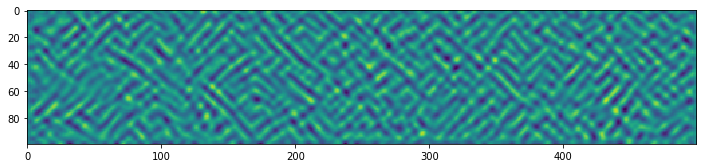

In [153]:
data = np.genfromtxt("rundir/output/u_00020")
plt.figure(figsize=(12,12))
plt.imshow(data[::-1,:])
plt.show()

In [67]:
setvar("""
MACHINE_IP=149.165.169.38
MACHINE_NAME=jetstream
DOMAIN=jetstream-cloud.org
EMAIL=sbrandt@cct.lsu.edu
AGAVE_USERNAME=stevenrbrandt
MACHINE_USERNAME=sbrandt
BASE_APP_NAME=funwave-tvd
PORT=22
ALLOCATION=hpc_hyrel17

DOCKERHUB_NAME=stevenrbrandt
WORK_DIR=/home/${MACHINE_USERNAME}
HOME_DIR=/home/${MACHINE_USERNAME}
SCRATCH_DIR=/home/${MACHINE_USERNAME}
DEPLOYMENT_PATH=agave-deployment
AGAVE_JSON_PARSER=jq
PATH=$HOME/agave/cli/bin:$PATH
""")

MACHINE_IP=149.165.169.38
MACHINE_NAME=jetstream
DOMAIN=jetstream-cloud.org
EMAIL=sbrandt@cct.lsu.edu
AGAVE_USERNAME=stevenrbrandt
MACHINE_USERNAME=sbrandt
BASE_APP_NAME=funwave-tvd
PORT=22
ALLOCATION=hpc_hyrel17
DOCKERHUB_NAME=stevenrbrandt
WORK_DIR=/home/sbrandt
HOME_DIR=/home/sbrandt
SCRATCH_DIR=/home/sbrandt
DEPLOYMENT_PATH=agave-deployment
AGAVE_JSON_PARSER=jq
PATH=/home/sbrandt/agave/cli/bin:/home/sbrandt/agave/cli/bin:/home/sbrandt/agave/cli/bin:/usr/lib64/openmpi/bin:/usr/local/bin/anaconda2/bin:/root/anaconda2/bin:/usr/local/bin/anaconda2/bin:/root/anaconda2/bin:/usr/local/sbin:/usr/local/bin:/sbin:/bin:/usr/sbin:/usr/bin:/root/bin


In [56]:
!docker tag funwave-tvd ${DOCKERHUB_NAME}/funwave-tvd:latest
!docker push ${DOCKERHUB_NAME}/funwave-tvd:latest

The push refers to a repository [docker.io/stevenrbrandt/funwave-tvd]

d49a189c: Preparing 
8a286ded: Preparing 
1e229e2e: Preparing 
86f1bf68: Preparing 
9e555372: Preparing 
6917689e: Preparing 
47e71dc0: Preparing 
c2077cde: Preparing 
7a2a783b: Preparing 
c2077cde: Waiting g 
6917689e: Layer already exists latest: digest: sha256:345643dcedc267512a67f1f455d807cd08b2de0bf1dc401f1b644df81c341ccd size: 2611


In [7]:
%cd ~/agave

/home/sbrandt/agave


In [8]:
readpass("AGAVE_PASSWD")

Password or secret: AGAVE_PASSWD
Reading file `AGAVE_PASSWD.txt'


In [9]:
readpass("PBTOK")

Password or secret: PBTOK
Reading file `PBTOK.txt'


In [10]:
setvar("APP_NAME=${BASE_APP_NAME}-${MACHINE_NAME}-${AGAVE_USERNAME}")

APP_NAME=funwave-tvd-jetstream-stevenrbrandt


In [ ]:
!git clone https://bitbucket.org/agaveapi/cli.git

In [ ]:
!tenants-init -t agave.prod

In [ ]:
!clients-delete -u $AGAVE_USERNAME -p "$AGAVE_PASSWD" $APP_NAME

In [ ]:
!clients-create -p "$AGAVE_PASSWD" -S -N $APP_NAME -u $AGAVE_USERNAME

In [ ]:
!auth-tokens-create -u $AGAVE_USERNAME -p "$AGAVE_PASSWD"

In [11]:
!auth-tokens-refresh

Token for agave.prod:stevenrbrandt successfully refreshed and cached for 14400 seconds
ec2a45dd2f3a9b01aacb37d5e98fd5


In [28]:
!ssh-keygen -f ${MACHINE_NAME}-key -N "" < /dev/null

Generating public/private rsa key pair.
Your identification has been saved in jetstream-key.
Your public key has been saved in jetstream-key.pub.
The key fingerprint is:
SHA256:VWC36EmgBzABscFt2LOjQ9w2UTFmDLEftnn1HTb2HHs sbrandt@melete05.cct.lsu.edu
The key's randomart image is:
+---[RSA 2048]----+
| .+**BB.. o.o    |
|  oo*=.+ o + .   |
| ..o.++ . = . =. |
|  o *o = = o + =o|
| . o o+ S o . ..E|
|  o    .        .|
|   .             |
|                 |
|                 |
+----[SHA256]-----+


In [12]:
!jsonpki --public ${MACHINE_NAME}-key.pub > ${MACHINE_NAME}-key.pub.txt
!jsonpki --private ${MACHINE_NAME}-key > ${MACHINE_NAME}-key.txt

In [13]:
!cat ${MACHINE_NAME}-key.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAABAQDAQcFUnnZaeTkHdtNz5B1YoqvUEJmgzFEe15kf1USfTRjYOlAkWlRmOu/GeBch2MOGKhTBsYetDRhgrmf0m/Nhiiaij8mFF4ygZgSCsUaZ5JSZLVCCkF8ypEeFHh3cunIKsmqLuwdnWji4X1q7jdwJekFkTJJHrJStSIdZSQn66347PySNwrx+vKWxwYFI7Qe3rq2IqSjADr1YlMqQz36TMdp7vCeK27eLhRoVVtTdtqLG+vUSwCPJwQKELHtQAI6vNI9WH5TTE3QrORdhtz2SshxP2I5jj1NFnXdqPP1RjR+/MJFojhus22iE2a/vGIH39HEdzBAooZpP5R7RgweX sbrandt@melete05.cct.lsu.edu


In [14]:
!ssh -o "StrictHostKeyChecking=no" -o "IdentitiesOnly=yes" -o "BatchMode=yes" \
    -o "IdentityFile=${MACHINE_NAME}-key" ${MACHINE_USERNAME}@${MACHINE_IP} -p ${PORT} \
  echo Key is installed

Key is installed


In [23]:
!auth-tokens-refresh

Token for agave.prod:stevenrbrandt successfully refreshed and cached for 14400 seconds
9423f6658af8dc28292cca364cac080


In [15]:
os.environ["PUB_KEY"]=readfile("${MACHINE_NAME}-key.pub.txt").strip()
os.environ["PRIV_KEY"]=readfile("${MACHINE_NAME}-key.txt").strip()

Reading file `jetstream-key.pub.txt'
Reading file `jetstream-key.txt'


In [68]:
setvar("STORAGE_MACHINE=${MACHINE_NAME}-storage-${AGAVE_USERNAME}")

STORAGE_MACHINE=jetstream-storage-stevenrbrandt


In [69]:
writefile("${STORAGE_MACHINE}.txt","""{
    "id": "${STORAGE_MACHINE}",
    "name": "${MACHINE_NAME} storage (${MACHINE_USERNAME})",
    "description": "The ${MACHINE_NAME} computer",
    "site": "${DOMAIN}",
    "type": "STORAGE",
    "storage": {
        "host": "${MACHINE_IP}",
        "port": ${PORT},
        "protocol": "SFTP",
        "rootDir": "/",
        "homeDir": "${HOME_DIR}",
        "auth": {
          "username" : "${MACHINE_USERNAME}",
          "publicKey" : "${PUB_KEY}",
          "privateKey" : "${PRIV_KEY}",
          "type" : "SSHKEYS"
        }
    }
}
""")

Writing file `jetstream-storage-stevenrbrandt.txt'


In [70]:
!systems-addupdate -F ${STORAGE_MACHINE}.txt

Successfully added system jetstream-storage-stevenrbrandt


In [71]:
!files-list -S ${STORAGE_MACHINE} ./ | head -5

The server, while acting as a gateway or proxy, received an invalid response from the upstream server it accessed in attempting to fulfill the request


In [18]:
setvar("EXEC_MACHINE=${MACHINE_NAME}-exec-${AGAVE_USERNAME}")

EXEC_MACHINE=jetstream-exec-stevenrbrandt


In [28]:
# Edit any parts of this file that you know need to be changed for your machine.
writefile("${EXEC_MACHINE}.txt","""
{
    "id": "${EXEC_MACHINE}",
    "name": "${MACHINE_NAME} (${MACHINE_USERNAME})",
    "description": "The ${MACHINE_NAME} computer",
    "site": "${DOMAIN}",
    "public": false,
    "status": "UP",
    "type": "EXECUTION",
    "executionType": "CLI",
    "scheduler" : "FORK",
    "environment": null,
    "scratchDir" : "${SCRATCH_DIR}",
    "queues": [
        {
            "name": "none",
            "default": true,
            "maxJobs": 10,
            "maxUserJobs": 10,
            "maxNodes": 6,
            "maxProcessorsPerNode": 6,
            "minProcessorsPerNode": 1,
            "maxRequestedTime": "00:30:00"
        }
    ],
    "login": {
        "auth": {
          "username" : "${MACHINE_USERNAME}",
          "publicKey" : "${PUB_KEY}",
          "privateKey" : "${PRIV_KEY}",
          "type" : "SSHKEYS"
        },
        "host": "${MACHINE_IP}",
        "port": ${PORT},
        "protocol": "SSH"
    },
    "maxSystemJobs": 50,
    "maxSystemJobsPerUser": 50,
    "storage": {
        "host": "${MACHINE_IP}",
        "port": ${PORT},
        "protocol": "SFTP",
        "rootDir": "/",
        "homeDir": "${HOME_DIR}",
        "auth": {
          "username" : "${MACHINE_USERNAME}",
          "publicKey" : "${PUB_KEY}",
          "privateKey" : "${PRIV_KEY}",
          "type" : "SSHKEYS"
        }
    },
    "workDir": "${WORK_DIR}"
}""")

Writing file `jetstream-exec-stevenrbrandt.txt'


In [29]:
!systems-addupdate -F ${EXEC_MACHINE}.txt

Successfully added system jetstream-exec-stevenrbrandt


In [30]:
# Test to see if this worked...
!files-list -S ${EXEC_MACHINE} ./ | head -5

.
.bash_history
.bash_logout
.bashrc
.cache


In [173]:
writefile("fork-wrapper.txt","""
#!/bin/bash
\${command}
""")

Writing file `fork-wrapper.txt'


In [174]:
!files-mkdir -S ${STORAGE_MACHINE} -N ${DEPLOYMENT_PATH}
!files-upload -F fork-wrapper.txt -S ${STORAGE_MACHINE} ${DEPLOYMENT_PATH}/

Successfully created folder agave-deployment
Uploading fork-wrapper.txt...
######################################################################## 100.0%


In [178]:
writefile("fork-test.txt","""
command=date
fork-wrapper.txt
""")

Writing file `fork-test.txt'


In [179]:
!files-mkdir -S ${STORAGE_MACHINE} -N ${DEPLOYMENT_PATH}
!files-upload -F fork-test.txt -S ${STORAGE_MACHINE} ${DEPLOYMENT_PATH}/

Successfully created folder agave-deployment
Uploading fork-test.txt...
######################################################################## 100.0%


In [215]:
writefile("fork-app.txt","""
{  
   "name":"${AGAVE_USERNAME}-${MACHINE_NAME}-fork",
   "version":"1.0",
   "label":"Runs a command",
   "shortDescription":"Runs a command",
   "longDescription":"",
   "deploymentSystem":"${STORAGE_MACHINE}",
   "deploymentPath":"${DEPLOYMENT_PATH}",
   "templatePath":"fork-wrapper.txt",
   "testPath":"fork-test.txt",
   "executionSystem":"${EXEC_MACHINE}",
   "executionType":"CLI",
   "parallelism":"SERIAL",
   "modules":[],
   "inputs":[],
   "parameters":[{
     "id" : "command",
     "value" : {
       "visible":true,
       "required":true,
       "type":"string",
       "order":0,
       "enquote":false,
       "default":"/bin/date",
       "validator":null
     },
     "details":{
         "label": "Command to run",
         "description": "This is the actual command you want to run. ex. df -h -d 1",
         "argument": null,
         "showArgument": false,
         "repeatArgument": false
     },
     "semantics":{
         "label": "Command to run",
         "description": "This is the actual command you want to run. ex. df -h -d 1",
         "argument": null,
         "showArgument": false,
         "repeatArgument": false
     }
   }],
   "outputs":[]
}
""")

Writing file `fork-app.txt'


In [216]:
!apps-addupdate -F fork-app.txt

Successfully added app stevenrbrandt-jetstream-fork-1.0


In [57]:
setvar("REMOTE_COMMAND=singularity create --size 2000 funwave-tvd.img && "+
       "singularity import funwave-tvd.img docker://stevenrbrandt/funwave-tvd:latest")

REMOTE_COMMAND=singularity create --size 2000 funwave-tvd.img && singularity import funwave-tvd.img docker://stevenrbrandt/funwave-tvd:latest


In [58]:
writefile("job.txt","""
 {
   "name":"fork-command-1",
   "appId": "${AGAVE_USERNAME}-${MACHINE_NAME}-fork-1.0",
   "executionSystem": "${EXEC_MACHINE}",
   "archive": false,
   "parameters": {
     "command":"${REMOTE_COMMAND}"
   }
 }
""")

Writing file `job.txt'


In [59]:
setvar("""
# Capture the output of the job submit command
OUTPUT=$(jobs-submit -F job.txt)
# Parse out the job id from the output
JOB_ID=$(echo $OUTPUT | cut -d' ' -f4)
""")

OUTPUT=Successfully submitted job 3424381413868048871-242ac11b-0001-007
JOB_ID=3424381413868048871-242ac11b-0001-007


In [62]:
from time import sleep
for iter in range(20):
    setvar("STAT=$(jobs-status $JOB_ID)")
    stat = os.environ["STAT"]
    sleep(5.0)
    if stat == "FINISHED" or stat == "FAILED":
        break

STAT=FINISHED


In [63]:
!echo jobs-history ${JOB_ID}
!jobs-history ${JOB_ID}

jobs-history 3424381413868048871-242ac11b-0001-007
Job accepted and queued for submission.
Skipping staging. No input data associated with this job.
Preparing job for submission.
Attempt 1 to submit job
Fetching app assets from agave://jetstream-storage-stevenrbrandt/agave-deployment
Staging runtime assets to agave://jetstream-exec-stevenrbrandt//home/sbrandt/stevenrbrandt/job-3424381413868048871-242ac11b-0001-007-fork-command-1
CLI job successfully forked as process id 25023
CLI job successfully forked as process id 25023
Job receieved duplicate RUNNING notification
Job completed execution
Job completed. Skipping archiving at user request.


In [64]:
!jobs-list -l 5

3424381413868048871-242ac11b-0001-007 FINISHED
5847149238358381031-242ac11b-0001-007 FINISHED
1400497847601589785-242ac11b-0001-007 FINISHED
1058286467047943705-242ac11b-0001-007 FINISHED
685029144806887911-242ac11b-0001-007 FAILED


In [65]:
!jobs-output-list ${JOB_ID}

.agave.archive
.agave.log
fork-command-1.err
fork-command-1.ipcexe
fork-command-1.out
fork-command-1.pid
fork-test.txt
fork-wrapper.txt
funwave-tvd-wrapper.txt
funwave-tvd.img
test.txt


In [66]:
!jobs-output-get ${JOB_ID} fork-command-1.out
!cat fork-command-1.out

######################################################################## 100.0%
Initializing Singularity image subsystem
Opening image file: funwave-tvd.img
Creating 2000MiB image
Binding image to loop
Creating file system within image
Image is done: funwave-tvd.img
Docker image path: index.docker.io/stevenrbrandt/funwave-tvd:latest
Cache folder set to /home/sbrandt/.singularity/docker
Importing: base Singularity environment
Importing: /home/sbrandt/.singularity/docker/sha256:60730f9603637b2b4d71f56eca6b7cf26f3c3a59478c45f1e53733901ea89b02.tar.gz
Importing: /home/sbrandt/.singularity/docker/sha256:f7d512d8250289b154a8e982ff1272ed1376e407bf21f314cd55627c22e5598e.tar.gz
Importing: /home/sbrandt/.singularity/docker/sha256:a7cad26d035791e5bf04d6479b03dee59d40a504cfd0b54840966f98b39abfc4.tar.gz
Importing: /home/sbrandt/.singularity/docker/sha256:25bb6f291ceb2dcdd3e24aa3a00ef625e6e1a022779283fc2c1b2ccecbc0d162.tar.gz
Importing: /home/sbrandt/.singularity/docker/sha256:630ceed02486a128742ac2b

In [55]:
!jobs-output-get ${JOB_ID} fork-command-1.err
!cat fork-command-1.err

In [ ]:
writefile("job2.txt","""
 {
   "name":"fork-command-1",
   "appId": "${AGAVE_USERNAME}-${MACHINE_NAME}-fork-1.0",
   "executionSystem": "${EXEC_MACHINE}",
   "archive": false,
   "parameters": {
     "command":"mpirun -np 4 /home/jovyan/"
   }
 }
""")

In [ ]:
# This cell enables inline plotting in the notebook
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load ascii data from a file
data0 = np.genfromtxt("drawgau0.txt")
data1 = np.genfromtxt("drawgau1.txt")
# Plot!
plt.figure()
plt.plot(data0[:,0],data0[:,1])
plt.plot(data1[:,0],data1[:,1])
plt.show()

In [ ]:
!jobs-pems-list ${JOB_ID}

In [ ]:
# permissions: READ, WRITE, READ_WRITE, ALL, NONE
!jobs-pems-update -u ktraxler -p READ ${JOB_ID}

In [ ]:
!jobs-pems-list ${JOB_ID}

In [ ]:
!apps-pems-list ${APP_NAME}-1.0

In [ ]:
# permissions: READ, WRITE, EXECUTE, READ_WRITE, READ_EXECUTE, WRITE_EXECUTE, ALL, and NONE
!apps-pems-update -u ktraxler -p READ_EXECUTE ${APP_NAME}-1.0

In [ ]:
!apps-pems-list ${APP_NAME}-1.0

In [ ]:
!echo Click the link to submit and run a job
!echo https://togo.agaveapi.co/app/#/apps/${APP_NAME}-1.0/run